<a href="https://colab.research.google.com/github/reza-pishva/PM/blob/main/clustering_gen_brg_vib_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
import joblib
warnings.filterwarnings("ignore")

In [87]:
cluster_no = 6

In [88]:
df1 = pd.read_csv('ccw-g11.csv')

In [89]:
filtered_df = df1[(df1['Job'] == 'Operation') & (df1['IsDeleted'] == 0) & (df1['ValueType'] == 1)]
df1 = filtered_df.drop(columns=['PersonelID', 'MobileID', 'Job', 'IsDeleted','OutofRange','ValueType','UnitID','OnTime'])


In [90]:
df2 = pd.read_csv('systems.csv')

In [91]:
# Merge df1 and df2 on AssetId
merged = pd.merge(df1, df2, on='AssetID', how='inner')

# Remove duplicates based on AssetId
unique_asset_descriptions = merged.drop_duplicates(subset='AssetID')


In [92]:
# Merge df1 and df2 on AssetId
merged_df = pd.merge(df1, df2, on='AssetID')

# Drop the AssetId column
result_df = merged_df.drop(columns=['KKS','MeasurementUnit','StartTime','DateTime','Version','Type',
                                    'AssetRange','ShowCondition','SequenceShow','Activation','AssetTag','ActiveTimeTag','ActivationTag','IsDeleted',
                                    'EditTime','RangeLL','RangeHH','RangeBol1','RangeBol2','RangeBol3','RangeBol4','NumType','Conditions','LTShort'])

In [93]:
# AssetIDs to check
asset_ids_to_check = [8330,8331,8332,8333,8335,8338,8339]
# Filter the DataFrame to include only the specified AssetIDs
filtered_df = result_df[result_df['AssetID'].isin(asset_ids_to_check)]

# Initialize a list to keep track of valid ShiftCodes
valid_shiftcodes = []

# Iterate through each ShiftCode and check the count of each AssetID
for shift_code in filtered_df['ShiftCode'].unique():
    shift_code_df = filtered_df[filtered_df['ShiftCode'] == shift_code]
    asset_count = shift_code_df['AssetID'].value_counts()

    if all(asset_count == 4):
        valid_shiftcodes.append(shift_code)

# Filter the original DataFrame to keep only the rows with valid ShiftCodes
result_df = result_df[result_df['ShiftCode'].isin(valid_shiftcodes)]


In [94]:
def df_preparing(asset_id1,asset_id2,asset_id3,asset_id4,asset_id5,asset_id6,asset_id7,date1,date2):
    # Filter the DataFrame for the given AssetID
    filtered_df1 = result_df[result_df['AssetID'] == asset_id1]
    filtered_df2 = result_df[result_df['AssetID'] == asset_id2]
    filtered_df3 = result_df[result_df['AssetID'] == asset_id3]
    filtered_df4 = result_df[result_df['AssetID'] == asset_id4]
    filtered_df5 = result_df[result_df['AssetID'] == asset_id5]
    filtered_df6 = result_df[result_df['AssetID'] == asset_id6]
    filtered_df7 = result_df[result_df['AssetID'] == asset_id7]
    # filtered_df8 = result_df[result_df['AssetID'] == asset_id8]
    # Combine RecordDate and RecordTime into a single datetime column
    filtered_df1['DateTime'] = pd.to_datetime(filtered_df1['RecordDate'] + ' ' + filtered_df1['RecordTime'])
    filtered_df2['DateTime'] = pd.to_datetime(filtered_df2['RecordDate'] + ' ' + filtered_df2['RecordTime'])
    filtered_df3['DateTime'] = pd.to_datetime(filtered_df3['RecordDate'] + ' ' + filtered_df3['RecordTime'])
    filtered_df4['DateTime'] = pd.to_datetime(filtered_df4['RecordDate'] + ' ' + filtered_df4['RecordTime'])
    filtered_df5['DateTime'] = pd.to_datetime(filtered_df5['RecordDate'] + ' ' + filtered_df5['RecordTime'])
    filtered_df6['DateTime'] = pd.to_datetime(filtered_df6['RecordDate'] + ' ' + filtered_df6['RecordTime'])
    filtered_df7['DateTime'] = pd.to_datetime(filtered_df7['RecordDate'] + ' ' + filtered_df7['RecordTime'])
    # filtered_df8['DateTime'] = pd.to_datetime(filtered_df8['RecordDate'] + ' ' + filtered_df8['RecordTime'])
    # Sort the DataFrame by DateTime
    filtered_df1 = filtered_df1.sort_values(by='DateTime')
    filtered_df2 = filtered_df2.sort_values(by='DateTime')
    filtered_df3 = filtered_df3.sort_values(by='DateTime')
    filtered_df4 = filtered_df4.sort_values(by='DateTime')
    filtered_df5 = filtered_df5.sort_values(by='DateTime')
    filtered_df6 = filtered_df6.sort_values(by='DateTime')
    filtered_df7 = filtered_df7.sort_values(by='DateTime')
    # filtered_df8 = filtered_df8.sort_values(by='DateTime')
    # Filter the DataFrame for the first month of 2022
    lube_oil_df1 = filtered_df1[(filtered_df1['DateTime'] >= date1) & (filtered_df1['DateTime'] <= date2)]
    lube_oil_df2 = filtered_df2[(filtered_df2['DateTime'] >= date1) & (filtered_df2['DateTime'] <= date2)]
    lube_oil_df3 = filtered_df3[(filtered_df3['DateTime'] >= date1) & (filtered_df3['DateTime'] <= date2)]
    lube_oil_df4 = filtered_df4[(filtered_df4['DateTime'] >= date1) & (filtered_df4['DateTime'] <= date2)]
    lube_oil_df5 = filtered_df5[(filtered_df5['DateTime'] >= date1) & (filtered_df5['DateTime'] <= date2)]
    lube_oil_df6 = filtered_df6[(filtered_df6['DateTime'] >= date1) & (filtered_df6['DateTime'] <= date2)]
    lube_oil_df7 = filtered_df7[(filtered_df7['DateTime'] >= date1) & (filtered_df7['DateTime'] <= date2)]
    # lube_oil_df8 = filtered_df8[(filtered_df8['DateTime'] >= date1) & (filtered_df8['DateTime'] <= date2)]
    # Display the DataFrame as HTML
    number_of_rows1 = lube_oil_df1.shape[0]
    number_of_rows2 = lube_oil_df2.shape[0]
    number_of_rows3 = lube_oil_df3.shape[0]
    number_of_rows4 = lube_oil_df4.shape[0]
    number_of_rows5 = lube_oil_df5.shape[0]
    number_of_rows6 = lube_oil_df6.shape[0]
    number_of_rows7 = lube_oil_df7.shape[0]
    # number_of_rows8 = lube_oil_df8.shape[0]
    lube_oil_df1.dropna(subset=['Value'])
    lube_oil_df2.dropna(subset=['Value'])
    lube_oil_df3.dropna(subset=['Value'])
    lube_oil_df4.dropna(subset=['Value'])
    lube_oil_df5.dropna(subset=['Value'])
    lube_oil_df6.dropna(subset=['Value'])
    lube_oil_df7.dropna(subset=['Value'])
    # lube_oil_df8.dropna(subset=['Value'])
    print("Number of rows1:", number_of_rows1)
    print("Number of rows2:", number_of_rows2)
    print("Number of rows3:", number_of_rows3)
    print("Number of rows4:", number_of_rows4)
    print("Number of rows5:", number_of_rows5)
    print("Number of rows6:", number_of_rows6)
    print("Number of rows7:", number_of_rows7)
    # print("Number of rows8:", number_of_rows8)
    # Ensure both DataFrames are properly indexed
    df1 = lube_oil_df1.reset_index(drop=True)
    df2 = lube_oil_df2.reset_index(drop=True)
    df3 = lube_oil_df3.reset_index(drop=True)
    df4 = lube_oil_df4.reset_index(drop=True)
    df5 = lube_oil_df5.reset_index(drop=True)
    df6 = lube_oil_df6.reset_index(drop=True)
    df7 = lube_oil_df7.reset_index(drop=True)
    # df8 = lube_oil_df8.reset_index(drop=True)
    # Create a new DataFrame by concatenating the 'Value' columns from each DataFrame
    combined_df = pd.concat([df1['Value'], df2['Value'], df3['Value'], df4['Value'], df5['Value'],df6['Value'],df7['Value']], axis=1)
    print("Number of concat rows:", combined_df.shape[0])
    # Rename the columns
    combined_df.columns = ['GEN.INLET AIR TEMP.',
                           'GEN.OUTLET AIR TEMP.',
                           'C.W.INLET TEMP.',
                           'C.W. OUTLET TEMP.',
                           'C.W PUMP OUT LET PRESS',
                           'C.W.INLET PRESSUR',
                           'C.W OUT LET PRESS']
    return combined_df

In [95]:
df = df_preparing(8330,8331,8332,8333,8335,8338,8339,'2021-01-01','2025-01-10')
# Convert specific columns to numeric
df['GEN.INLET AIR TEMP.'] = pd.to_numeric(df['GEN.INLET AIR TEMP.'])
df['GEN.OUTLET AIR TEMP.'] = pd.to_numeric(df['GEN.OUTLET AIR TEMP.'])
df['C.W.INLET TEMP.'] = pd.to_numeric(df['C.W.INLET TEMP.'])
df['C.W. OUTLET TEMP.'] = pd.to_numeric(df['C.W. OUTLET TEMP.'])
df['C.W PUMP OUT LET PRESS'] = pd.to_numeric(df['C.W PUMP OUT LET PRESS'])
df['C.W.INLET PRESSUR'] = pd.to_numeric(df['C.W.INLET PRESSUR'])
df['C.W OUT LET PRESS'] = pd.to_numeric(df['C.W OUT LET PRESS'])


Number of rows1: 5240
Number of rows2: 5240
Number of rows3: 5240
Number of rows4: 5240
Number of rows5: 5240
Number of rows6: 5240
Number of rows7: 5240
Number of concat rows: 5240


In [96]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [97]:
gmm = GaussianMixture(n_components=cluster_no, random_state=42)
clusters = gmm.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters


In [98]:
# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
# Convert to DataFrame for better visualization
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Count']
print(cluster_counts_df)

   Cluster  Count
0        0    709
1        1   2226
2        2    282
3        3   1216
4        4    193
5        5    614


In [99]:
# Sample one data point from each cluster
sample_data_points = []

for cluster_label in sorted(df['Cluster'].unique()):
    sample_point = df[df['Cluster'] == cluster_label].iloc[0]  # Select the first data point from each cluster
    sample_data_points.append(sample_point)

# Convert the list of sample data points to a DataFrame for better visualization
sample_data_df = pd.DataFrame(sample_data_points)

# Display the sample data points for each cluster
print(sample_data_df)


      GEN.INLET AIR TEMP.  GEN.OUTLET AIR TEMP.  C.W.INLET TEMP.  \
6                    50.0                  79.0             47.0   
4                    40.0                  69.0             37.0   
0                    38.0                  70.0             33.0   
1581                 37.0                  63.0             31.0   
69                   44.0                  75.0             60.0   
764                  38.0                  66.0             33.0   

      C.W. OUTLET TEMP.  C.W PUMP OUT LET PRESS  C.W.INLET PRESSUR  \
6                  53.0                    4.90                0.0   
4                  43.0                    4.90                4.4   
0                  40.0                    4.90                4.6   
1581               35.0                    4.90                0.0   
69                 46.0                    4.85                4.6   
764                37.0                    4.80                4.2   

      C.W OUT LET PRESS  Cluster

In [100]:
# Sample data point
sample_data = pd.DataFrame([{
    'GEN.INLET AIR TEMP.':40,
    'GEN.OUTLET AIR TEMP.':69,
    'C.W.INLET TEMP.':37,
    'C.W. OUTLET TEMP.':43,
    'C.W PUMP OUT LET PRESS':4.9,
    'C.W.INLET PRESSUR':4.4,
    'C.W OUT LET PRESS':4.2}])

# Scale the sample data point
scaled_sample_data = scaler.transform(sample_data)

# Use Nearest Neighbors to find the closest cluster
nearest_neighbors = NearestNeighbors(n_neighbors=1)
nearest_neighbors.fit(scaled_data)  # Fit on the training data


# Find the nearest cluster for the sample data point
_, indices = nearest_neighbors.kneighbors(scaled_sample_data)
predicted_cluster = clusters[indices[0][0]]

print(f'The predicted cluster for the sample data point is: {predicted_cluster}')


The predicted cluster for the sample data point is: 1


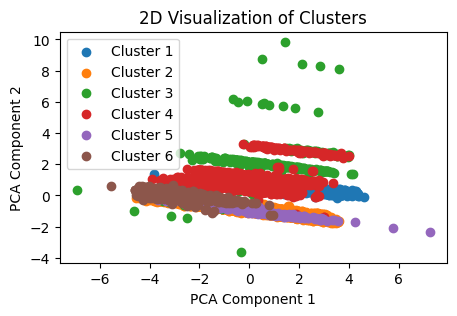

In [101]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaled_data)

# Plot the data points with cluster labels
plt.figure(figsize=(5, 3))
for i in range(cluster_no):
    plt.scatter(data_2d[clusters == i, 0], data_2d[clusters == i, 1], label=f'Cluster {i+1}')
plt.title('2D Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

Average Silhouette Score: 0.152732874781018


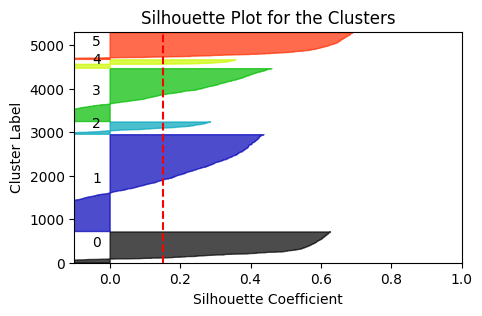

<Figure size 400x300 with 0 Axes>

In [102]:
# Number of clusters for KMeans
n_clusters = cluster_no
# Add cluster labels to the original DataFrame
df['Cluster'] = clusters
# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Average Silhouette Score: {silhouette_avg}")

# Calculate the Silhouette Coefficients for each sample
sample_silhouette_values = silhouette_samples(scaled_data, clusters)

# Create the Silhouette Plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(5, 3)

# Set limits for the plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

# Initialize the y-axis position
y_lower = 10

for i in range(n_clusters):
    # Aggregate silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

# Plot the average silhouette score as a vertical line
plt.figure(figsize=(4, 3))
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_title("Silhouette Plot for the Clusters")
ax1.set_xlabel("Silhouette Coefficient")
ax1.set_ylabel("Cluster Label")
plt.show()

In [103]:
joblib.dump(clusters, 'clusters_ccw_gaussian.joblib')
joblib.dump(gmm, 'model_ccw_gaussian.joblib')
joblib.dump(scaler, 'scaler_ccw_gaussian.joblib')
joblib.dump(nearest_neighbors, 'model2_ccw_gaussian.joblib')

['model2_ccw_gaussian.joblib']